In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob


In [2]:
 ! pip install -q kaggle



In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"coder0nin","key":"6eb19bc1be6cc0fd72d3ccd74d50646d"}'}

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d robikscube/textocr-text-extraction-from-images-dataset

textocr-text-extraction-from-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip /content/textocr-text-extraction-from-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_val_images/train_images/3437304c906a53bc.jpg  
  inflating: train_val_images/train_images/34376cf272a2cddd.jpg  
  inflating: train_val_images/train_images/34378b0f7d6ea5ca.jpg  
  inflating: train_val_images/train_images/34383171f3665d1d.jpg  
  inflating: train_val_images/train_images/343b8d67ef54733e.jpg  
  inflating: train_val_images/train_images/343c393561a25e56.jpg  
  inflating: train_val_images/train_images/343eacca8019f49e.jpg  
  inflating: train_val_images/train_images/3440696fbd9c030c.jpg  
  inflating: train_val_images/train_images/344193868ca2f738.jpg  
  inflating: train_val_images/train_images/3441bbf19a60fb55.jpg  
  inflating: train_val_images/train_images/34455e60f461fe2f.jpg  
  inflating: train_val_images/train_images/344f8045f92afb02.jpg  
  inflating: train_val_images/train_images/34521ae35bdf8e64.jpg  
  inflating: train_val_images/train_images/345303c74bcf2e07.jpg  
  inflating: train_val_im

In [8]:

annot = pd.read_parquet('/content/annot.parquet')
imgs = pd.read_parquet('/content/img.parquet')

In [9]:
annot.head()

,id,image_id,bbox,utf8_string,points,area
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,"[525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...",6707.90
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,"[535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...",3483.69
2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,"[626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...",3071.27
3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,"[580.02, 143.61, 724.53, 141.87, 723.66, 184.9...",6341.30
4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,"[395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...",2350.69


In [10]:
## Putting all image paths into one single list

img_list = glob('/content/train_val_images/train_images/*')
glob('/content/train_val_images/train_images/*')

['/content/train_val_images/train_images/e1f55394c542fe7d.jpg',
 '/content/train_val_images/train_images/8e67cebf6512806e.jpg',
 '/content/train_val_images/train_images/1c1a94a0bb9c8937.jpg',
 '/content/train_val_images/train_images/3fe980edb250d430.jpg',
 '/content/train_val_images/train_images/0690772599861289.jpg',
 '/content/train_val_images/train_images/582ac97abbc2613e.jpg',
 '/content/train_val_images/train_images/ad5599d86a25d147.jpg',
 '/content/train_val_images/train_images/36ad0ef50defe16c.jpg',
 '/content/train_val_images/train_images/b45698b5e2b95146.jpg',
 '/content/train_val_images/train_images/02352c9c5a13aa94.jpg',
 '/content/train_val_images/train_images/0071e67f53f3dc39.jpg',
 '/content/train_val_images/train_images/5ac1e21658fe1807.jpg',
 '/content/train_val_images/train_images/3f4f2a21c45717cd.jpg',
 '/content/train_val_images/train_images/6e67673d01eeed71.jpg',
 '/content/train_val_images/train_images/04df64098449dcce.jpg',
 '/content/train_val_images/train_images

# Plot Example Image

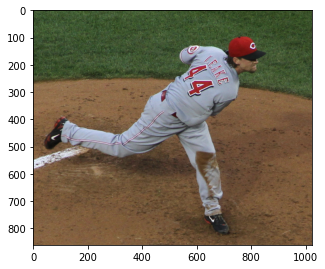

In [11]:
plt.subplots(figsize=(5,5))
plt.imshow(plt.imread(img_list[0]))

In [12]:
image_id = img_list[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

,id,image_id,bbox,utf8_string,points,area
337813,e1f55394c542fe7d_1,e1f55394c542fe7d,"[621.65, 157.78, 104.13, 121.57]",LEAKE,"[651.28, 157.78, 692.24, 197.87, 725.78, 266.2...",12659.08
337814,e1f55394c542fe7d_2,e1f55394c542fe7d,"[546.27, 192.2, 131.59, 135.51]",44,"[636.9, 192.2, 677.86, 296.77, 571.98, 327.71,...",17831.76
337815,e1f55394c542fe7d_3,e1f55394c542fe7d,"[573.43, 132.47, 25.98, 27.31]",.,"[599.41, 133.41, 586.13, 159.78, 573.43, 158.2...",709.51
337816,e1f55394c542fe7d_4,e1f55394c542fe7d,"[792.41, 116.92, 27.02, 27.45]",C,"[792.41, 116.92, 818.0, 117.35, 819.43, 144.37...",741.70


# Display for first 25 images


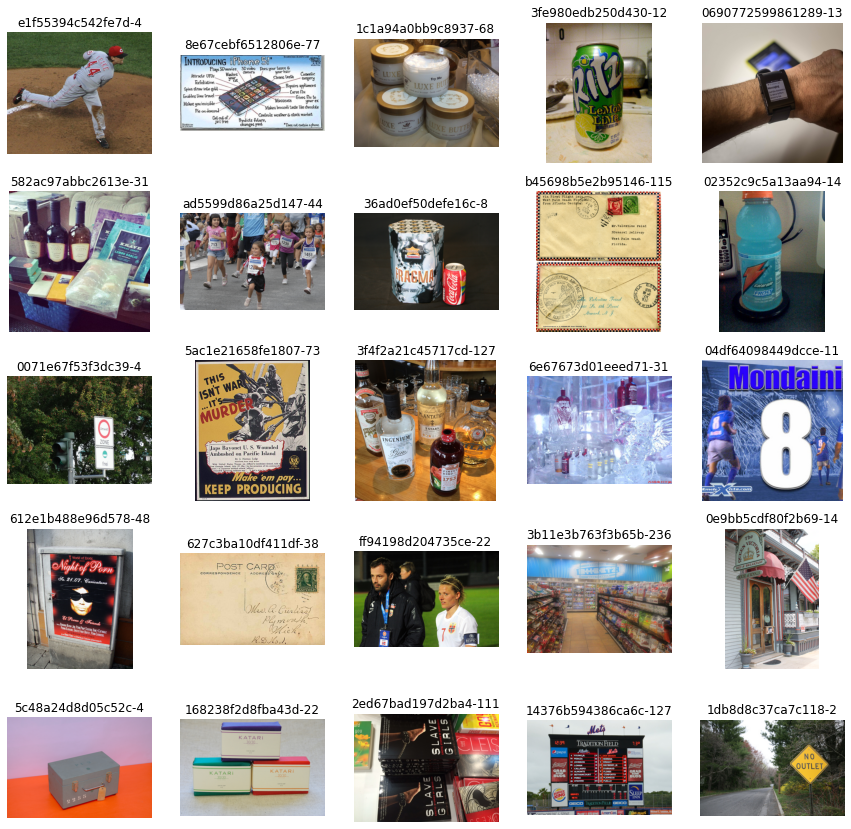

In [16]:
fig,axs = plt.subplots(5,5,figsize=(15,15))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_list[i]))
    axs[i].axis('off')
    image_id = img_list[i].split('/')[-1].split('.')[0]
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id}-{n_annot}')

# METHOD 1 - PYTESSERACT

In [21]:
!pip install pytesseract


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pytesseract as pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/local/lib/python3.9/dist-packages'

print(pytesseract.image_to_string(img_list[11], lang ='eng'))

PermissionError: ignored

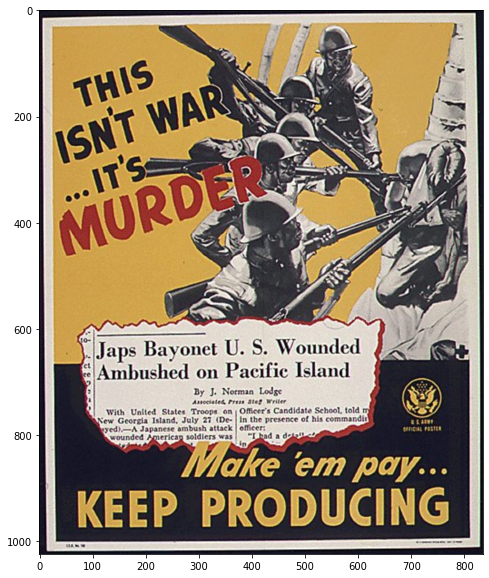

In [23]:
plt.subplots(figsize=(10,10))
plt.imshow(plt.imread(img_list[11]))

METHOD 2 - EASYOCR

In [18]:
!pip install easyocr
import easyocr

reader = easyocr.Reader(['en'], gpu = False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [20]:
results = reader.readtext(img_list[11])
pd.DataFrame(results, columns= ['bounding-box','text','confidence-levels'])

,bounding-box,text,confidence-levels
0,"[[188, 608], [611, 608], [611, 668], [188, 668]]",Bayonet U. S. Wounded,0.619166
1,"[[106, 654], [592, 654], [592, 702], [106, 702]]",Ambushed on Pacific Island,0.977391
2,"[[289, 709], [337, 709], [337, 729], [289, 729]]",By J,0.790759
3,"[[342, 706], [462, 706], [462, 730], [342, 730]]",Norian Losse,0.317018
4,"[[289, 731], [423, 731], [423, 745], [289, 745]]","4""eial TI Sei",0.013373
5,"[[427, 731], [467, 731], [467, 745], [427, 745]]",Ktdee,0.009093
6,"[[125, 749], [163, 749], [163, 765], [125, 765]]",Wich,0.722467
7,"[[169, 747], [223, 747], [223, 765], [169, 765]]",Unllcd,0.504277
8,"[[229, 749], [279, 749], [279, 765], [229, 765]]",States,0.387846
9,"[[285, 749], [339, 749], [339, 765], [285, 765]]",Troops,0.534128


# METHOD 3 - KERAS OCR

In [24]:
!pip install keras-ocr -q

In [25]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [26]:
pipeline.recognize([img_list[11]])

2/2 [==============================] - 13s 5s/step


[[('this', array([[ 57.22513, 131.73676],
          [207.2463 ,  85.89697],
          [225.17856, 144.58435],
          [ 75.15738, 190.42413]], dtype=float32)),
  ('war', array([[200.23112, 173.1983 ],
          [346.90244, 132.0274 ],
          [364.96576, 196.37805],
          [218.29446, 237.54895]], dtype=float32)),
  ('isnt', array([[ 20.518856, 228.46165 ],
          [176.3148  , 175.42473 ],
          [199.87666 , 244.63771 ],
          [ 44.08072 , 297.67462 ]], dtype=float32)),
  ('its', array([[ 62.514072, 303.47278 ],
          [194.88556 , 261.3546  ],
          [212.23453 , 315.87994 ],
          [ 79.86304 , 357.9981  ]], dtype=float32)),
  ('murder', array([[ 25.96157, 369.96585],
          [419.15018, 266.95334],
          [444.25284, 362.7678 ],
          [ 51.06424, 465.7803 ]], dtype=float32)),
  ('wounded', array([[448.803  , 617.08545],
          [607.85864, 615.4286 ],
          [608.2113 , 649.27905],
          [449.15564, 650.9359 ]], dtype=float32)),
  ('s', a